# Trending skills analysis for data analyst jobs

In [42]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [40]:
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no,job_posted_month_name
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1,Jan
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12,Dec
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10,Oct
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10,Oct
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1,Jan
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1,Jan
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3,Mar
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3,Mar


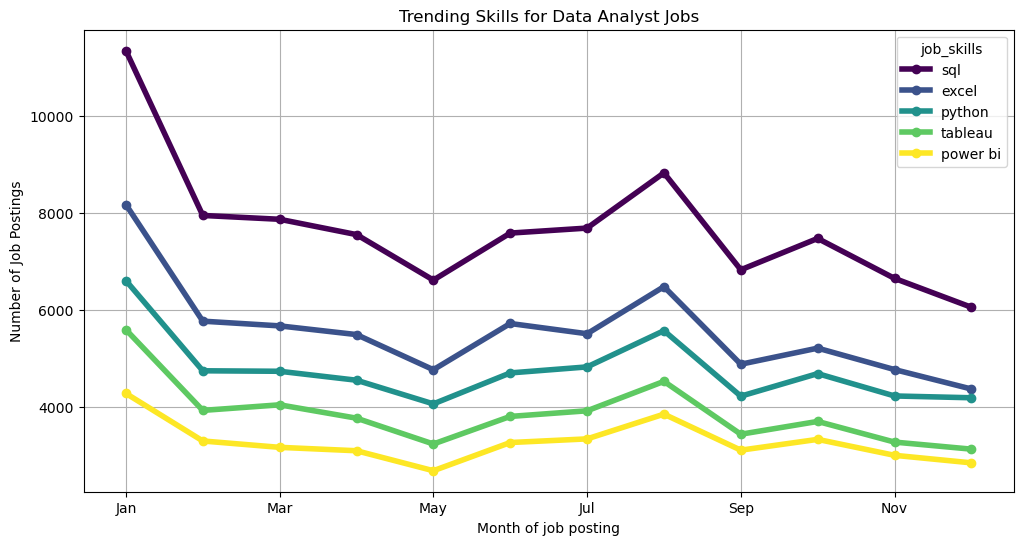

In [41]:
# Extracting month from job posted date for Data Analyst jobs
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df['job_posted_date'].dt.month.copy()
df_DA['job_posted_month_name'] = df_DA['job_posted_date'].dt.strftime('%b')

# Exploding the job_skills column to analyze skills trends
df_skills_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_skills_exploded.pivot_table(
  index='job_posted_month_name', 
  columns='job_skills', 
  aggfunc='size', 
  fill_value=0
)

# To keep months in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_DA_pivot = df_DA_pivot.reindex(month_order)


# Sorting the DataFrame by month and summing the skills
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Plotting the top 5 trending skills for Data Analyst jobs
df_DA_pivot.iloc[:, :5].plot(
  kind='line',
  linewidth = 4,
  # linestyle = '--' options '-', '--', '-.', ':', 'None'.
  colormap= 'viridis', # options 'viridis', 'plasma', 'inferno', 'magma', 'cividis'.
  marker='o', # options 'o', 's', '^', 'D', 'x', '+', 'v', '<', '>', 'p', '*', 'h', 'H', '|', '_'
  figsize=(12,6),
  grid=True
)
plt.title('Trending Skills for Data Analyst Jobs')
plt.xlabel('Month of job posting')
plt.ylabel('Number of Job Postings')

plt.show()

# Customizing our Scatter Plot. (from 12_matplotlib_scatter_plot.ipynb)

<Figure size 1000x600 with 0 Axes>

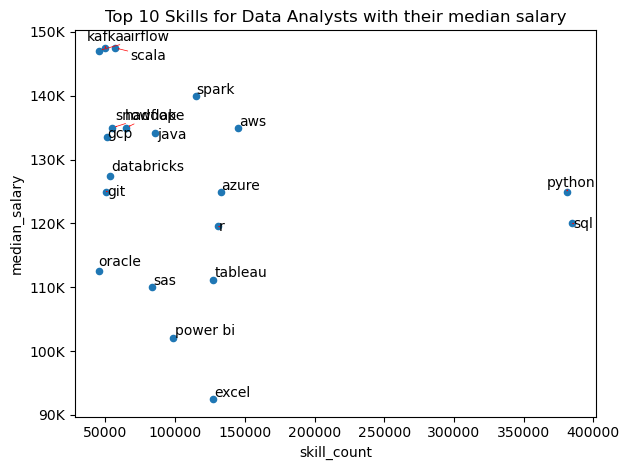

In [55]:
from adjustText import adjust_text

# exploding the job_skills column for further analysis
df_exploded = df.explode('job_skills')

# Grouping by job_skills to get the count and median salary
skill_count = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Sorting the skills by count and median salary
skill_stats = skill_count.sort_values(by='skill_count', ascending=False).head(20)

# plotting the top 20 skills with their median salary
plt.figure(figsize=(10, 6))
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))


plt.title('Top 10 Skills for Data Analysts with their median salary')
plt.xlabel('skill_count')
plt.ylabel('median_salary')
plt.tight_layout()

texts = []
for i, txt in enumerate(skill_stats.index):
  texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red', lw=0.5))

plt.show()